# Comparing Regressors

Here, I will compare several ML algorithms for building regression models of Acetylcholinesterase Inhibitors.

## 1. Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## 2. Reading the dataset

In [3]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [4]:
X = df.drop('pIC50', axis = 1)
Y = df.pIC50

## 3. Data Pre-processing

In [5]:
# Examine X Dimension
X.shape

(6156, 881)

In [6]:
# Removing low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * ( 1 - .8)))
X = selection.fit_transform(X)
X.shape

(6156, 144)

In [7]:
# performing data splitting using 80-20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## 4. Comparing ML Algorithms

In [8]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose = 0, ignore_warnings = True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [01:51<00:01,  1.94s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 4924, number of used features: 144
[LightGBM] [Info] Start training from score 5.821106


100%|██████████| 42/42 [01:52<00:00,  2.67s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [01:40<00:01,  1.51s/it]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 4924, number of used features: 144
[LightGBM] [Info] Start training from score 5.821106


100%|██████████| 42/42 [01:40<00:00,  2.40s/it]


In [9]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.82,0.83,0.65,0.29
ExtraTreeRegressor,0.82,0.83,0.65,0.31
ExtraTreesRegressor,0.82,0.83,0.65,22.61
GaussianProcessRegressor,0.82,0.83,0.65,14.88
RandomForestRegressor,0.77,0.78,0.74,18.86
XGBRegressor,0.75,0.76,0.77,1.23
BaggingRegressor,0.74,0.75,0.78,2.12
MLPRegressor,0.71,0.72,0.82,9.82
HistGradientBoostingRegressor,0.55,0.56,1.03,2.34


In [10]:
# Performance table of test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.31,0.39,1.23,2.07
LGBMRegressor,0.30,0.38,1.24,0.33
RandomForestRegressor,0.30,0.38,1.25,17.16
BaggingRegressor,0.27,0.35,1.28,1.81
SVR,0.26,0.35,1.28,4.36
NuSVR,0.26,0.35,1.28,3.94
XGBRegressor,0.26,0.35,1.28,1.10
GradientBoostingRegressor,0.21,0.31,1.32,2.52
KNeighborsRegressor,0.20,0.30,1.33,0.12


## 5. Data Visualization of Model Performance

[(0.0, 1.0)]

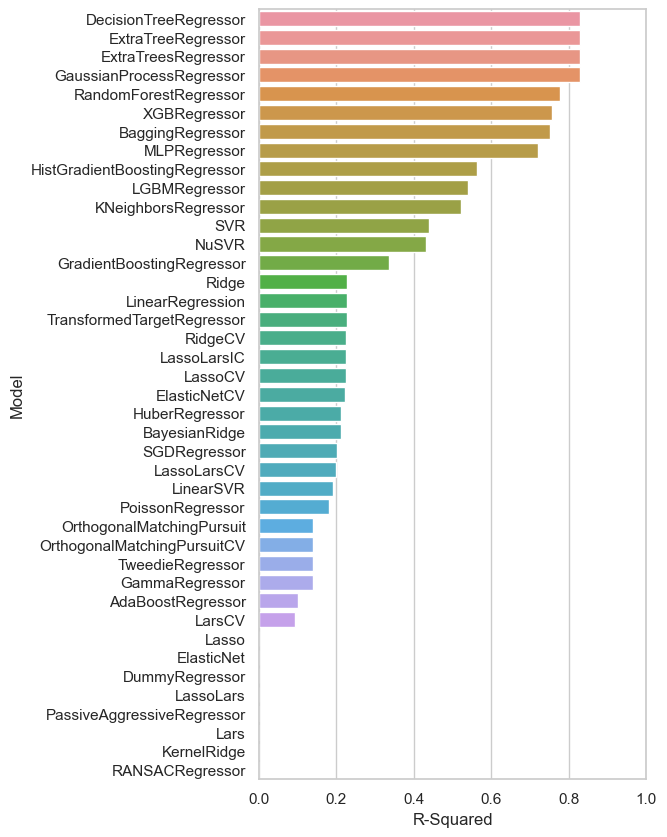

In [11]:
# Bar Plot of R-Squared Values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (5, 10))
sns.set_theme(style='whitegrid')
ax = sns.barplot(y= predictions_train.index, x = 'R-Squared', data = predictions_train)
ax.set(xlim = (0,1))

[(0.0, 10.0)]

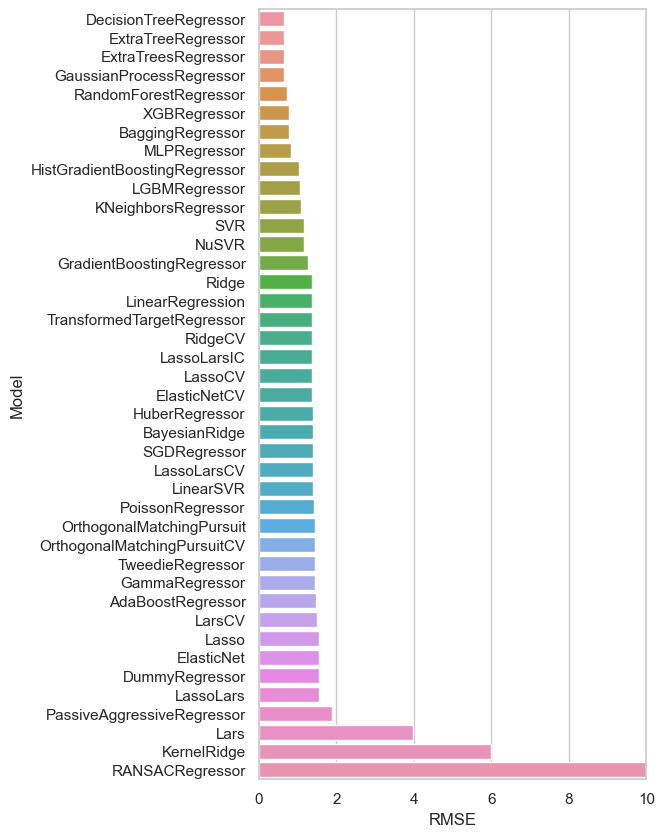

In [12]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

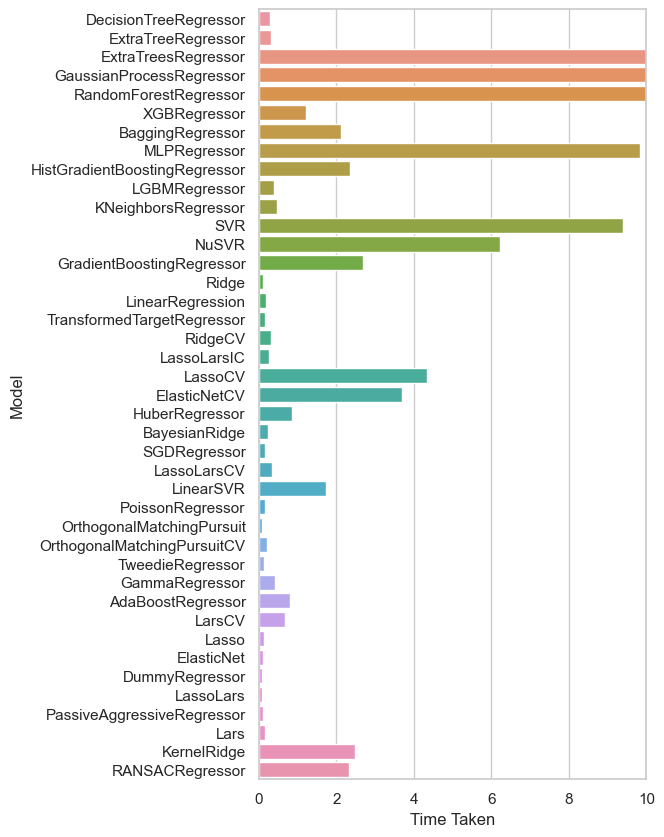

In [13]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))